### Multiple Linear regression

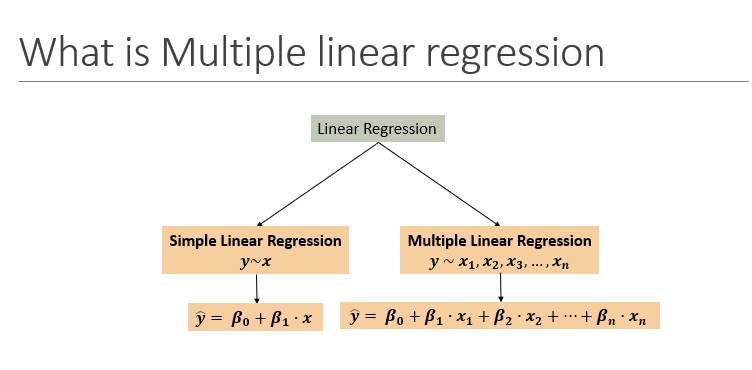

In [28]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1- Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### PROFIT ~ RND, ADMIN, MKT
### PROFIT_pred = B0 + B1xRND + B2xADMIN + B3xMKT
### STEP 2- perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3 - visualization data

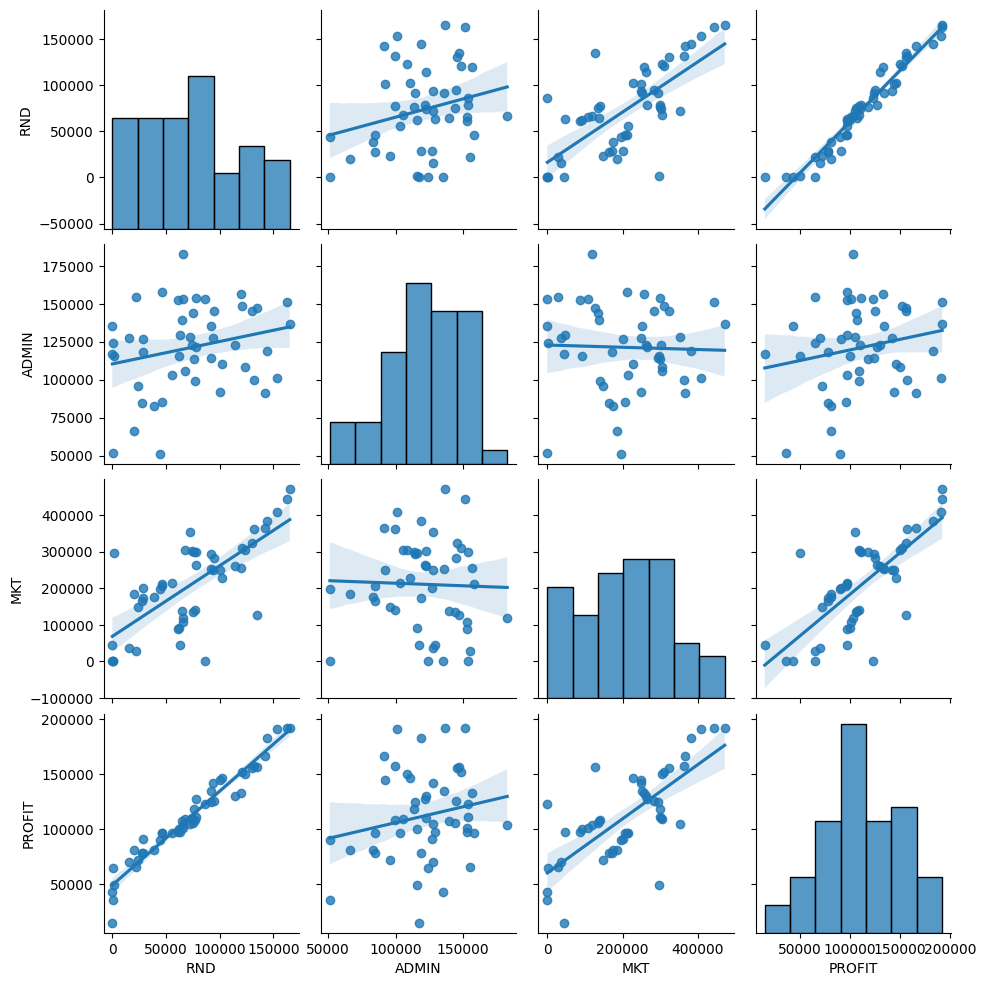

In [7]:
import seaborn as sns
sns.pairplot(df, kind="reg")

In [8]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


### Step 4 - Separete X(RND, ADMIN, MKT), Y(PROFIT)

In [9]:
X =df[["RND", "ADMIN", "MKT"]]
Y = df[["PROFIT"]]

In [10]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


### Step5 - Create a LinearReg model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [13]:
model.intercept_

array([50122.19298987])

In [14]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [15]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

### PROFIT_Pred = 50122.19+0.8057xRND - 0.0268xADMIN + 0.0272xMKT


1. If RND increase by 1 unit profit will increase by 0.8057 units
2. If ADMIN increases by 1 unit profit will decrease by 0.02668 units
3. If MKT increases by 1 unit profit will increase by 0.0272

### From above result RND is having most impact here because it has highest coef
### Model Evaluation

In [16]:
# R2 score for model
model.score(X, Y)

0.9507459940683246

In [17]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [18]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [19]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [20]:
def evaluate_model(model, x, y):
    # Predict the result
    ypred = model.predict(x)
    # Calulate metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [21]:
evaluate_model(model, X, Y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 : 95.07%


### From above metrics this model is good as R>80%
### Out of sample prediction

In [22]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [23]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [24]:
def predict_profit(model, rnd, admin, mkt):
    xnew = [[rnd, admin, mkt]]
    pred = model.predict(xnew)
    return pred

In [25]:
predict_profit(model, rnd=1_00_000, admin= 50_000, mkt=60_000)

c:\Machine Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[130986.58344975]])

In [26]:
predict_profit(model, rnd=40000, admin=50000, mkt= 100000)

c:\Machine Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[83732.80304684]])

In [27]:
predict_profit(model, rnd=150000, admin= 60000, mkt= 60000)

c:\Machine Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[171004.17626159]])